# Evaluación Final
## Visualización de datos para la toma de decisiones

### Ricardo Nader Estrada
### A00827708

### Introducción

El set de datos que se utilizó en esta exploración fue recopilado del UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php). 
Este set contiene información acerca de el desempeño escolar de estudiantes de dos colegios de Portugal, así como de información acerca de la vida personal de los estudiantes. Contiene atributos variados desde la vida familiar hasta vida social. 
En esta investigación se planea analizar las variables y encontrar las correlaciones que tienen con las notas finales de los estudiantes, asi como comparar el impacto que tienen.

### Estudio de las variables
El set contiene muchas variables que se podrían considerar como "importantes" al estudiar las razones para un bajo rendimiento academico. Sin embargo, para este estudio se han seleccionado algunas que se consideró como más interesantes para explorar. Estas son las siguientes:

'sex' = student's sex (binary: "F" - female or "M" - male). 
Además de encontrar la relación que tiene el sexo de los estudiantes con su desempeño, se pretende evaluar el nivel de afectación que esta variable tiene en relación con las otras. Es decir, encontrar si es que el sexo tiene algo que ver con cómo manejan los estudiantes las diferentes situaciones familiares, personales, etc.

'famsize' - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3). Tamaño de la familia.

Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart). Padres juntos o separados. Se puede encontrar correlacion con las calificaciones y con la vida social.

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

absences - number of school absences (numeric: from 0 to 93)

G3 - final grade (numeric: from 0 to 20, output target)

### Preguntas de Exploración

 -  ¿Como se comparan social y academicamente los hombres y mujeres?
 -  ¿Existe correlación entre la actividad social de los estudiantes y el consumo de alcohol con las calificaciones?
 -  ¿En que aspectos se deberian concentrar los colegios para ayudar a sus estudiantes con el desempeño académico?

### Stakeholders

Principalmente, esta información es de alta relevancia para el departamento directivo y pedagógico de los colegios. Podría ayudar en la toma de decisiones y en el apoyo que brinden a los estudiantes para mejorar el desempeño academico. También puede ser de relevancia para los padres que esten interesados en ayudar a sus hijos. Finalmente, departamentos psicológicos pueden utilizar esta información para el estudio a fondo de las razones de estas correlaciones.

### Exploración

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('studentperformance.csv')

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df.drop(['school','age', 'address', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'Dalc', 'health', 'G1', 'G2'],
       axis = 1,
        inplace = True
       )

In [5]:
df

,sex,famsize,Pstatus,studytime,goout,Walc,absences,G3
0,F,GT3,A,2,4,1,4,11
1,F,GT3,T,2,3,1,2,11
2,F,LE3,T,2,2,3,6,12
3,F,GT3,T,3,2,1,0,14
4,F,GT3,T,2,2,2,0,13
...,...,...,...,...,...,...,...,...
644,F,GT3,T,3,2,2,4,10
645,F,LE3,T,2,4,1,4,16
646,F,GT3,T,2,1,1,6,9
647,M,LE3,T,1,5,4,6,10


### Data Overview

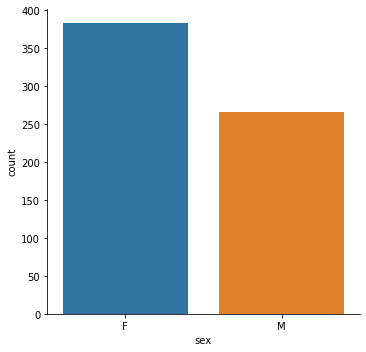

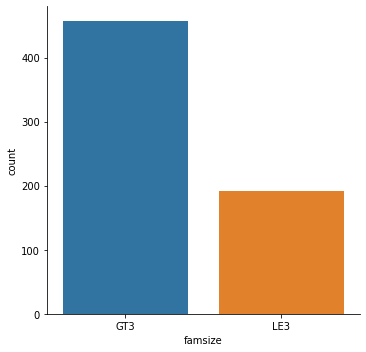

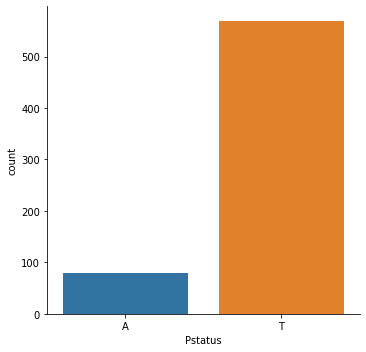

In [6]:
sns.catplot(data=df,
           x='sex',
           y=None,
           kind='count')

sns.catplot(data=df,
           x='famsize',
           y=None,
           kind='count')

sns.catplot(data=df,
           x='Pstatus',
           y=None,
           kind='count')

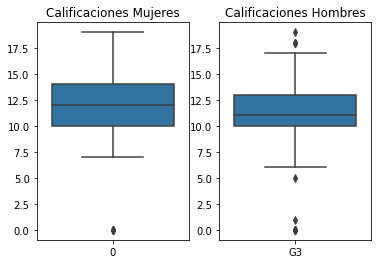

In [7]:
fig = plt.figure()

ax1=fig.add_subplot(1,2,1) 
sns.boxplot(data=df.loc[df['sex']=='F', 'G3'])

ax2=fig.add_subplot(1,2,2)
sns.boxplot(data=df.loc[df['sex']=='M', ['G3']])

ax1.title.set_text('Calificaciones Mujeres')
ax2.title.set_text('Calificaciones Hombres')
plt.show()

Como se puede observar, la media de las mujeres se encuentra mas arriba que la de los hombres, osea que el promedio de calificaciones de mujeres es mejor. Además, los hombres tienen datos atípicos dentr de las mejores calificaciones, mientras que en las mujeres las mejores calificaciones si se encuentran dentro del cuartil mayor.

In [8]:
pd.pivot_table(df,
              index=['sex'],
              values=['studytime', 'absences', 'Walc', 'goout'],
              aggfunc='mean')

,Walc,absences,goout,studytime
sex,,,,
F,1.937337,3.577023,3.127937,2.073107
M,2.774436,3.778195,3.266917,1.725564


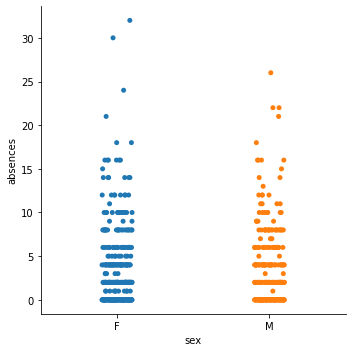

In [9]:
sns.catplot(data=df,
           x='sex',
           y='absences',
           )

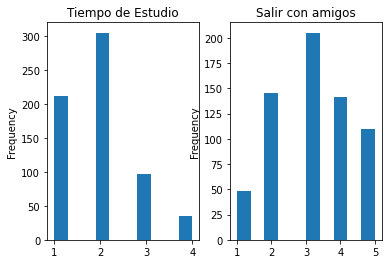

In [10]:
fig = plt.figure()

ax1=fig.add_subplot(1,2,1) 
df['studytime'].plot(kind='hist')

ax2=fig.add_subplot(1,2,2)
df['goout'].plot(kind='hist')

ax1.title.set_text('Tiempo de Estudio')
ax2.title.set_text('Salir con amigos')
plt.show()

### Correlaciones

#### Ausencias

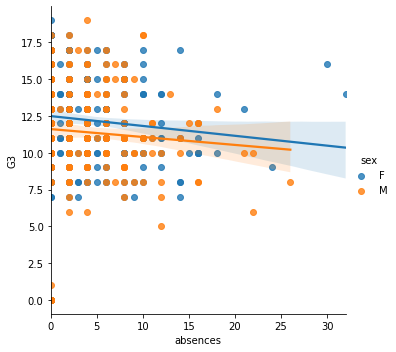

In [11]:
 
sns.lmplot(
    x= 'absences',
    y= 'G3',
    data = df,
    fit_reg = True,
    hue= 'sex'
)


In [12]:
X=df["absences"].values 
Y=df['G3'].values 
import statsmodels.api as sm 

model=sm.OLS.from_formula("Y~X", 
                         data=df)
result=model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.448
Date:                Fri, 10 Sep 2021   Prob (F-statistic):             0.0199
Time:                        06:23:34   Log-Likelihood:                -1678.7
No. Observations:                 649   AIC:                             3361.
Df Residuals:                     647   BIC:                             3370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1388      0.161     75.399      0.000      11.823      12.455
X             -0.0636      0.027     -2.334      0.020      -0.117      -0.010
==============================================================================
Omnibus:                      130.386   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.149
Skew:                          -0.993   Prob(JB):                     2.29e-79
Kurtosis:                       6.074   Cond. No.                         7.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Tiempo de estudio

In [13]:
pd.pivot_table(df,
              index=['studytime'],
              values=['G3'],
              aggfunc='mean')

,G3
studytime,
1,10.844340
2,12.091803
3,13.226804
4,13.057143


In [14]:
X=df["studytime"].values 
Y=df['G3'].values 
import statsmodels.api as sm 

model=sm.OLS.from_formula("Y~X", 
                         data=df)
result=model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     43.06
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.09e-10
Time:                        06:23:34   Log-Likelihood:                -1660.6
No. Observations:                 649   AIC:                             3325.
Df Residuals:                     647   BIC:                             3334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0278      0.312     32.191      0.000       9.416      10.639
X              0.9728      0.148      6.562      0.000       0.682       1.264
==============================================================================
Omnibus:                      116.648   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.561
Skew:                          -0.929   Prob(JB):                     8.05e-64
Kurtosis:                       5.701   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Consumo de Alcohol

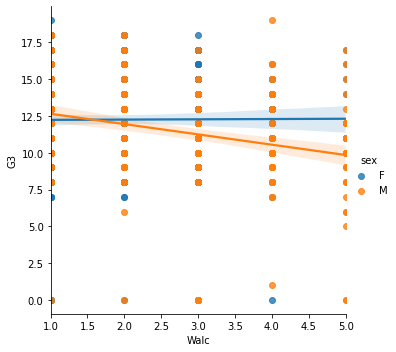

In [15]:
sns.lmplot(
    x= 'Walc',
    y= 'G3',
    data = df,
    fit_reg = True,
    hue= 'sex'
)

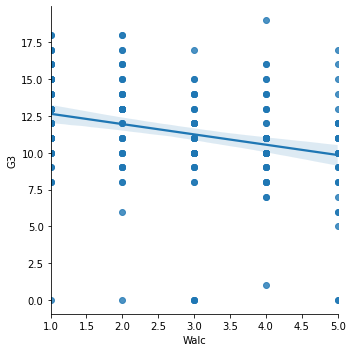

In [16]:
isM = df['sex']=='M'

dfM = df[isM]

sns.lmplot(
    x= 'Walc',
    y= 'G3',
    data = dfM,
    fit_reg = True,
)

In [17]:
X=dfM["Walc"].values 
Y=dfM['G3'].values 
import statsmodels.api as sm 

model=sm.OLS.from_formula("Y~X", 
                         data=dfM)
result=model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     25.82
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           7.09e-07
Time:                        06:23:35   Log-Likelihood:                -683.77
No. Observations:                 266   AIC:                             1372.
Df Residuals:                     264   BIC:                             1379.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3498      0.429     31.104      0.000      12.505      14.195
X             -0.7006      0.138     -5.082      0.000      -0.972      -0.429
==============================================================================
Omnibus:                       64.566   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.620
Skew:                          -1.087   Prob(JB):                     1.21e-38
Kurtosis:                       6.321   Cond. No.                         7.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pd.pivot_table(df,
              index=['goout'],
              values=['G3'],
              aggfunc='mean')

,G3
goout,
1,10.729167
2,12.668966
3,12.151220
4,11.971631
5,10.872727


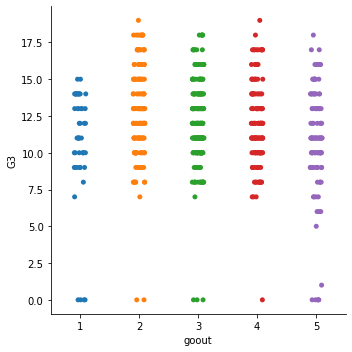

In [19]:
sns.catplot(data=df,
           x='goout',
           y='G3',
           )

## Conclusiones

 -  ¿Como se comparan social y academicamente los hombres y mujeres?
 Las mujeres se destacan mas academicamente, y tienden a salir menos, faltar menos al colegio y consumir menos alcohol.
 
 -  ¿En que aspectos se deberian concentrar los colegios para ayudar a sus estudiantes con el desempeño académico?
 Analizando la tabla, se ve que las horas de estudio ideales son 3 para los estudiantes con mejores calificaciones. La actividad social no parece tener tanta correlacion con las calificaciones, al contrario, al parecer los alumnos que no salen mucho con amigos estan sufriendo con sus calificaciones. El consumo de alcohol en los hombres parece si tener un efecto.  Este parece ser un area en la que los departamentos psicologicos de los colegios se pueden concentrar. 
